##### Libraries

---



In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import History, EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn import metrics
from keras.datasets import cifar10
from keras import backend as K
from time import time
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix

##### Load Data
---



In [3]:
# load data

((x, y), (x_test, y_test)) = cifar10.load_data()
x = x/255
x_test = x_test/255

170500096/170498071 [==============================] - 2s 0us/step


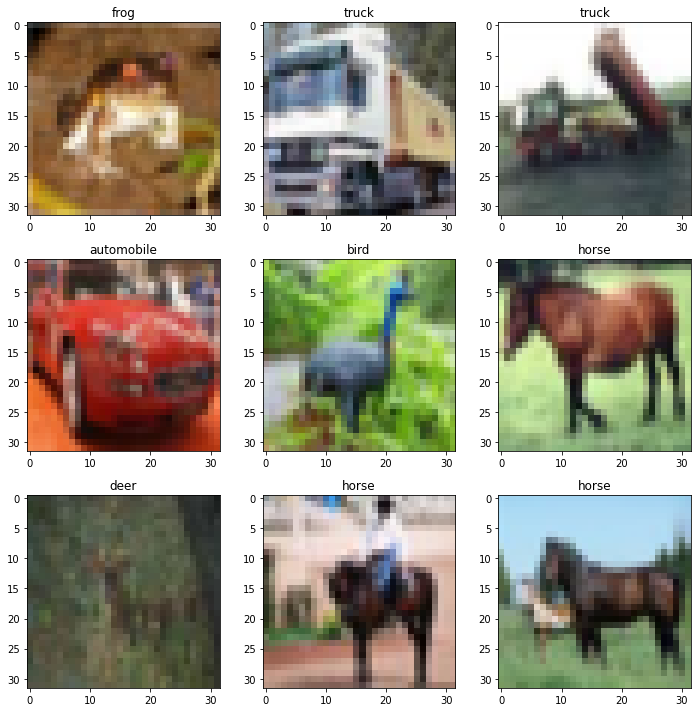

In [4]:
# show some of the pictures and their labels

labels = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer',
          5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}

fig, axs = plt.subplots(3,3)
fig.set_figheight(10)
fig.set_figwidth(10)

for i in range(3):
  for j in range(3):
    axs[i,j].imshow(x[5*i+j])
    axs[i,j].title.set_text(labels[y[:,0][5*i+j]])
fig.tight_layout()

In [5]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.1, random_state=101)

In [6]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
y_valid = to_categorical(y_valid,10)

In [7]:
x_train.shape[1:]

(32, 32, 3)

##### Training

In [15]:
# Create the model

history = History()
mycall = EarlyStopping(monitor='val_accuracy', patience=3)
model = Sequential()

model.add(Conv2D(64,kernel_size=(3,3), activation='relu', input_shape=x_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten(input_shape=x_train[0].shape))

model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))


# Configure the model and start training
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

start = time()

model.fit(x=x_train,y=y_train,
          validation_data=(x_valid,y_valid),
          batch_size=256,epochs=15, verbose=2,
          callbacks=[history,mycall])
print("training time consumption = %.2f" %(time()-start), 'sec')

Epoch 1/15
176/176 - 3s - loss: 2.0179 - accuracy: 0.3215 - val_loss: 2.1047 - val_accuracy: 0.3382
Epoch 2/15
176/176 - 3s - loss: 1.7942 - accuracy: 0.4744 - val_loss: 1.8515 - val_accuracy: 0.4962
Epoch 3/15
176/176 - 3s - loss: 1.6707 - accuracy: 0.5210 - val_loss: 1.6579 - val_accuracy: 0.5338
Epoch 4/15
176/176 - 3s - loss: 1.5619 - accuracy: 0.5543 - val_loss: 1.4868 - val_accuracy: 0.5676
Epoch 5/15
176/176 - 3s - loss: 1.4700 - accuracy: 0.5735 - val_loss: 1.3841 - val_accuracy: 0.5992
Epoch 6/15
176/176 - 3s - loss: 1.3852 - accuracy: 0.5949 - val_loss: 1.2920 - val_accuracy: 0.6060
Epoch 7/15
176/176 - 3s - loss: 1.3146 - accuracy: 0.6073 - val_loss: 1.2476 - val_accuracy: 0.6032
Epoch 8/15
176/176 - 3s - loss: 1.2481 - accuracy: 0.6218 - val_loss: 1.2060 - val_accuracy: 0.6142
Epoch 9/15
176/176 - 3s - loss: 1.1953 - accuracy: 0.6327 - val_loss: 1.1969 - val_accuracy: 0.6222
Epoch 10/15
176/176 - 3s - loss: 1.1490 - accuracy: 0.6401 - val_loss: 1.0432 - val_accuracy: 0.6758

In [9]:
print(model.summary())
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('test loss = ', loss)
print('test accuracy = ', acc)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0

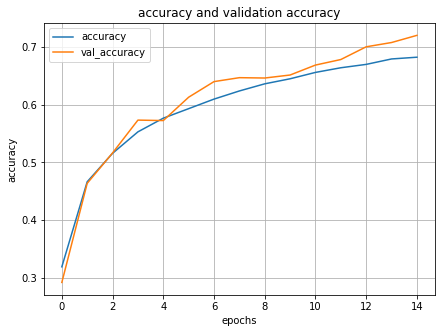

In [10]:
acc = pd.DataFrame({'accuracy':history.history['accuracy'],
                     'val_accuracy':history.history['val_accuracy']})
acc.plot(figsize=(7,5))
plt.xlabel('epochs'), plt.ylabel('accuracy'), plt.title('accuracy and validation accuracy')
plt.grid()

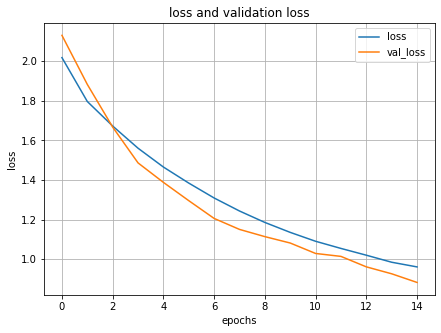

In [11]:
los = pd.DataFrame({'loss':history.history['loss'],
                     'val_loss':history.history['val_loss']})
los.plot(figsize=(7,5))
plt.xlabel('epochs'), plt.ylabel('loss'), plt.title('loss and validation loss')
plt.grid()

Text(42.0, 0.5, 'True label')

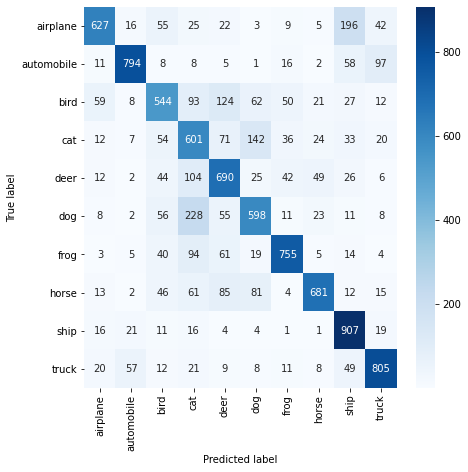

In [12]:
lbls = list(labels.values())
prediction = model.predict(x_test)
matrix  = metrics.confusion_matrix(y_test.argmax(axis=1), prediction.argmax(axis=1))
confusion = pd.DataFrame(matrix, index=lbls, columns=lbls)

plt.figure(figsize=(7,7))
sns.heatmap(confusion, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')